# Part 2: Image Classification with Deep Learning (40 Points)

## 1. Load the dataset Micro-Organism Image Classification dataset from the given link: https://www.kaggle.com/datasets/mdwaquarazam/microorganism-image-classification (2 points)
## This dataset comprises 789 images of 8 different classes, 75 images per class.

In [1]:
import sys, os
import pandas as pd
from collections import defaultdict

import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

In [2]:
path = "/Users/hims/Downloads/Micro_Organism"

class_labels = sorted(list(filter(lambda x: not "DS_Store" in x, os.listdir(path))))

class_labels_dict = {}
for class_label in class_labels:
    instances = len(list(filter(lambda x: not "DS_Store" in x, os.listdir(f'{path}/{class_label}'))))
    class_labels_dict[class_label] = instances


df = pd.DataFrame(list(class_labels_dict.items()), columns=['Microorganism', 'Count'])
df.head(10)    

,Microorganism,Count
0,Amoeba,72
1,Euglena,168
2,Hydra,76
3,Paramecium,152
4,Rod_bacteria,85
5,Spherical_bacteria,86
6,Spiral_bacteria,75
7,Yeast,75


In [49]:
path = "/Users/hims/Downloads/Micro_Organism"

transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = ImageFolder(root=path, transform=transform)

In [4]:
class_names = dataset.classes
print("Number of Samples = ", len(dataset.samples))
print("classes = ", ", ".join(class_names))

Number of Samples =  789
classes =  Amoeba, Euglena, Hydra, Paramecium, Rod_bacteria, Spherical_bacteria, Spiral_bacteria, Yeast


## 2. Explain in your own words: (7 points)

* a. Gradient Descent (1 point)
* b. Drop out (1 point)
* c. Activation functions (1 point)
* d. Back Propagation (1 point)
* e. Epochs, Iterations, and Batch size (3 points)

## - Explained in the Report

# 3. Visualize/summarize the data (10 points)

## a. Number of entities in the training and testing set and number of classes in the target variable (1 point)

In [5]:
# Split the dataset into train and test sets
train_size = int(0.8 * len(dataset)) 
test_size = len(dataset) - train_size
train_data, test_data = random_split(dataset, [train_size, test_size])

Train Data size = 631
Test Data Size = 158
Number of Classes in the dataset = 8
classes =  Amoeba, Euglena, Hydra, Paramecium, Rod_bacteria, Spherical_bacteria, Spiral_bacteria, Yeast


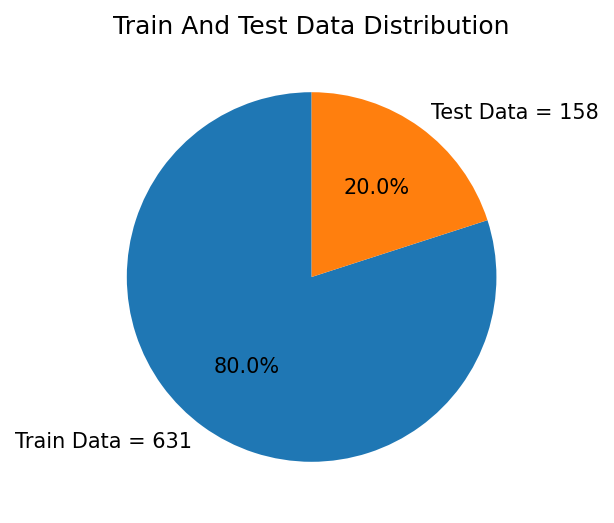

In [60]:
# Number of entities in the training and testing set and number of classes in the target variable (1 point)

print(f"Train Data size = {len(train_data)}")
print(f"Test Data Size = {len(test_data)}")
print(f"Number of Classes in the dataset = {len(dataset.classes)}")
print("classes = ", ", ".join(class_names))

# Create the pie chart
plt.figure(figsize=(4, 4), dpi=150)
plt.pie([len(train_data), len(test_data)], labels=[f"Train Data = {len(train_data)}", f"Test Data = {len(test_data)}"], autopct='%1.1f%%', startangle=90)
plt.title('Train And Test Data Distribution')
plt.savefig('part2/train_and_test_distribution.png')
plt.show()


## b. Number of pixels in the image (Height and width individually) (2 points) 

In [7]:
min_height, min_width = float('inf'), float('inf')
max_height, max_width = float('-inf'), float('-inf')
min_pixel, max_pixel = float('inf'), float('-inf')

for image, label in train_data:
    
    _, height, width = image.shape  
    min_height = min(min_height, height)
    min_width = min(min_width, width)
    max_height = max(max_height, height)
    max_width = max(max_width, width)
    min_pixel = min(min_pixel, height * width)
    max_pixel = max(max_pixel, height * width)

print(f"Minimum Height: {min_height}, Minimum Width: {min_width}")
print(f"Maximum Height: {max_height}, Maximum Width: {max_width}")
print(f"Mnimum Pixel size: {min_pixel}, Maximum Pixel size: {max_pixel}")


Minimum Height: 121, Minimum Width: 146
Maximum Height: 3000, Maximum Width: 4767
Mnimum Pixel size: 21175, Maximum Pixel size: 12000000


In [8]:
# so making the images to a standard size 

mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image to 256x256
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=mean, std=std)  # Normalize the image
])

dataset = ImageFolder(root=path, transform=transform)

image, label = dataset[0]
_, height, width = tuple(image.shape)
print("After transformation the New sizes are")

print(f"New Height: {height}")
print(f"New Height: {width}")
print(f"Number of Pixels: {height*width}")

After transformation the New sizes are
New Height: 256
New Height: 256
Number of Pixels: 65536


## c. Number of images per class (1 point)


        Microorganism  Count
0              Amoeba     72
1             Euglena    168
2               Hydra     76
3          Paramecium    152
4        Rod_bacteria     85
5  Spherical_bacteria     86
6     Spiral_bacteria     75
7               Yeast     75


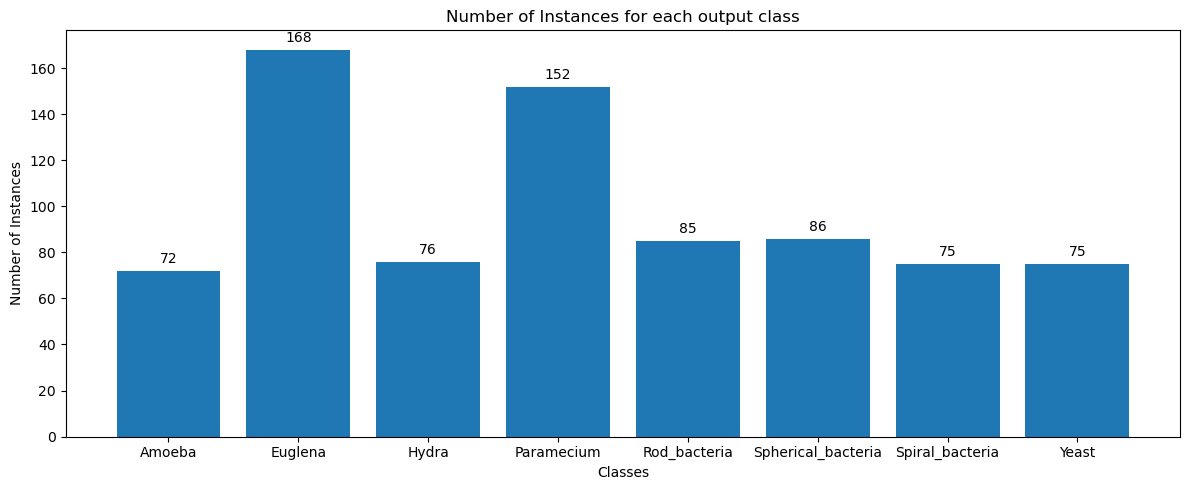

In [52]:
def show_class_distribution(dataset, plot=False, title='', starter='full_data'):
    class_counts = defaultdict(int)
    for image, label in dataset:
        class_counts[class_names[label]] += 1

    df = pd.DataFrame(list(class_counts.items()), columns=['Microorganism', 'Count'])
    print(df.head(10))

    if not plot: return
    plt.figure(figsize=(12, 5), dpi=100)
    labels = sorted(class_counts.keys())
    counts = [class_counts[k] for k in sorted(class_counts.keys())]
    plt.bar(labels, counts)
    plt.xlabel('Classes')
    plt.ylabel('Number of Instances')
    plt.title(title)
    plt.xticks(range(len(labels)), labels)
    for i, count in enumerate([class_counts[k] for k in sorted(class_counts.keys())]):
        plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.savefig(f'part2/{starter}_output_classes.png')
    plt.show()


show_class_distribution(dataset, plot=True, title='Number of Instances for each output class')

## d. Display at least 2 images of each class (6 points)

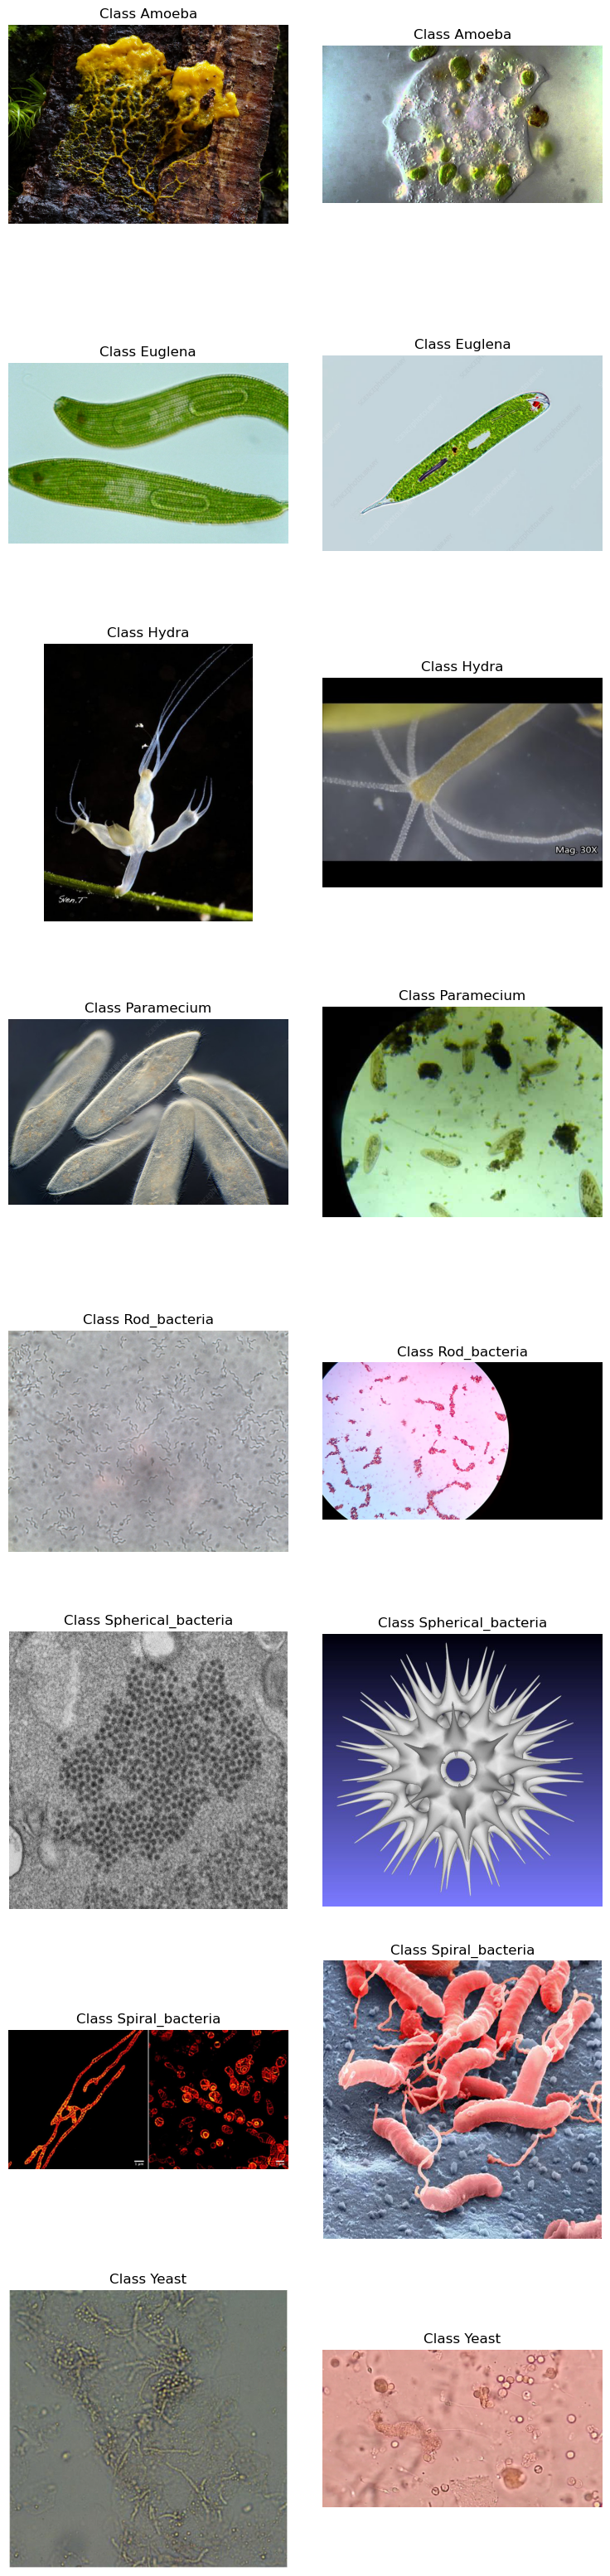

In [53]:
import random

def display_images_per_class(dataset, num_images=2):
    class_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset):
        class_indices[label].append(idx)

    # Display at least num_images images of each class
    fig, axes = plt.subplots(len(dataset.classes), num_images, figsize=(4*num_images, 4*len(dataset.classes)), dpi=100)
    for class_label, indices in class_indices.items():
        for i, idx in enumerate(random.sample(indices,num_images)):
            image, _ = dataset[idx]
            axes[class_label, i].imshow(image.permute(1, 2, 0).numpy())
            axes[class_label, i].axis('off')
            axes[class_label, i].set_title(f"Class {class_names[class_label]}")

    plt.tight_layout(pad=3.0)
    plt.savefig("part2/sample_images.png")
    plt.show()

display_images_per_class(dataset, num_images=2)

# 4. Train a neural network (21 points)



Train data distribution => 
        Microorganism  Count
0             Euglena    141
1          Paramecium    119
2        Rod_bacteria     66
3               Hydra     62
4               Yeast     59
5              Amoeba     57
6     Spiral_bacteria     52
7  Spherical_bacteria     75


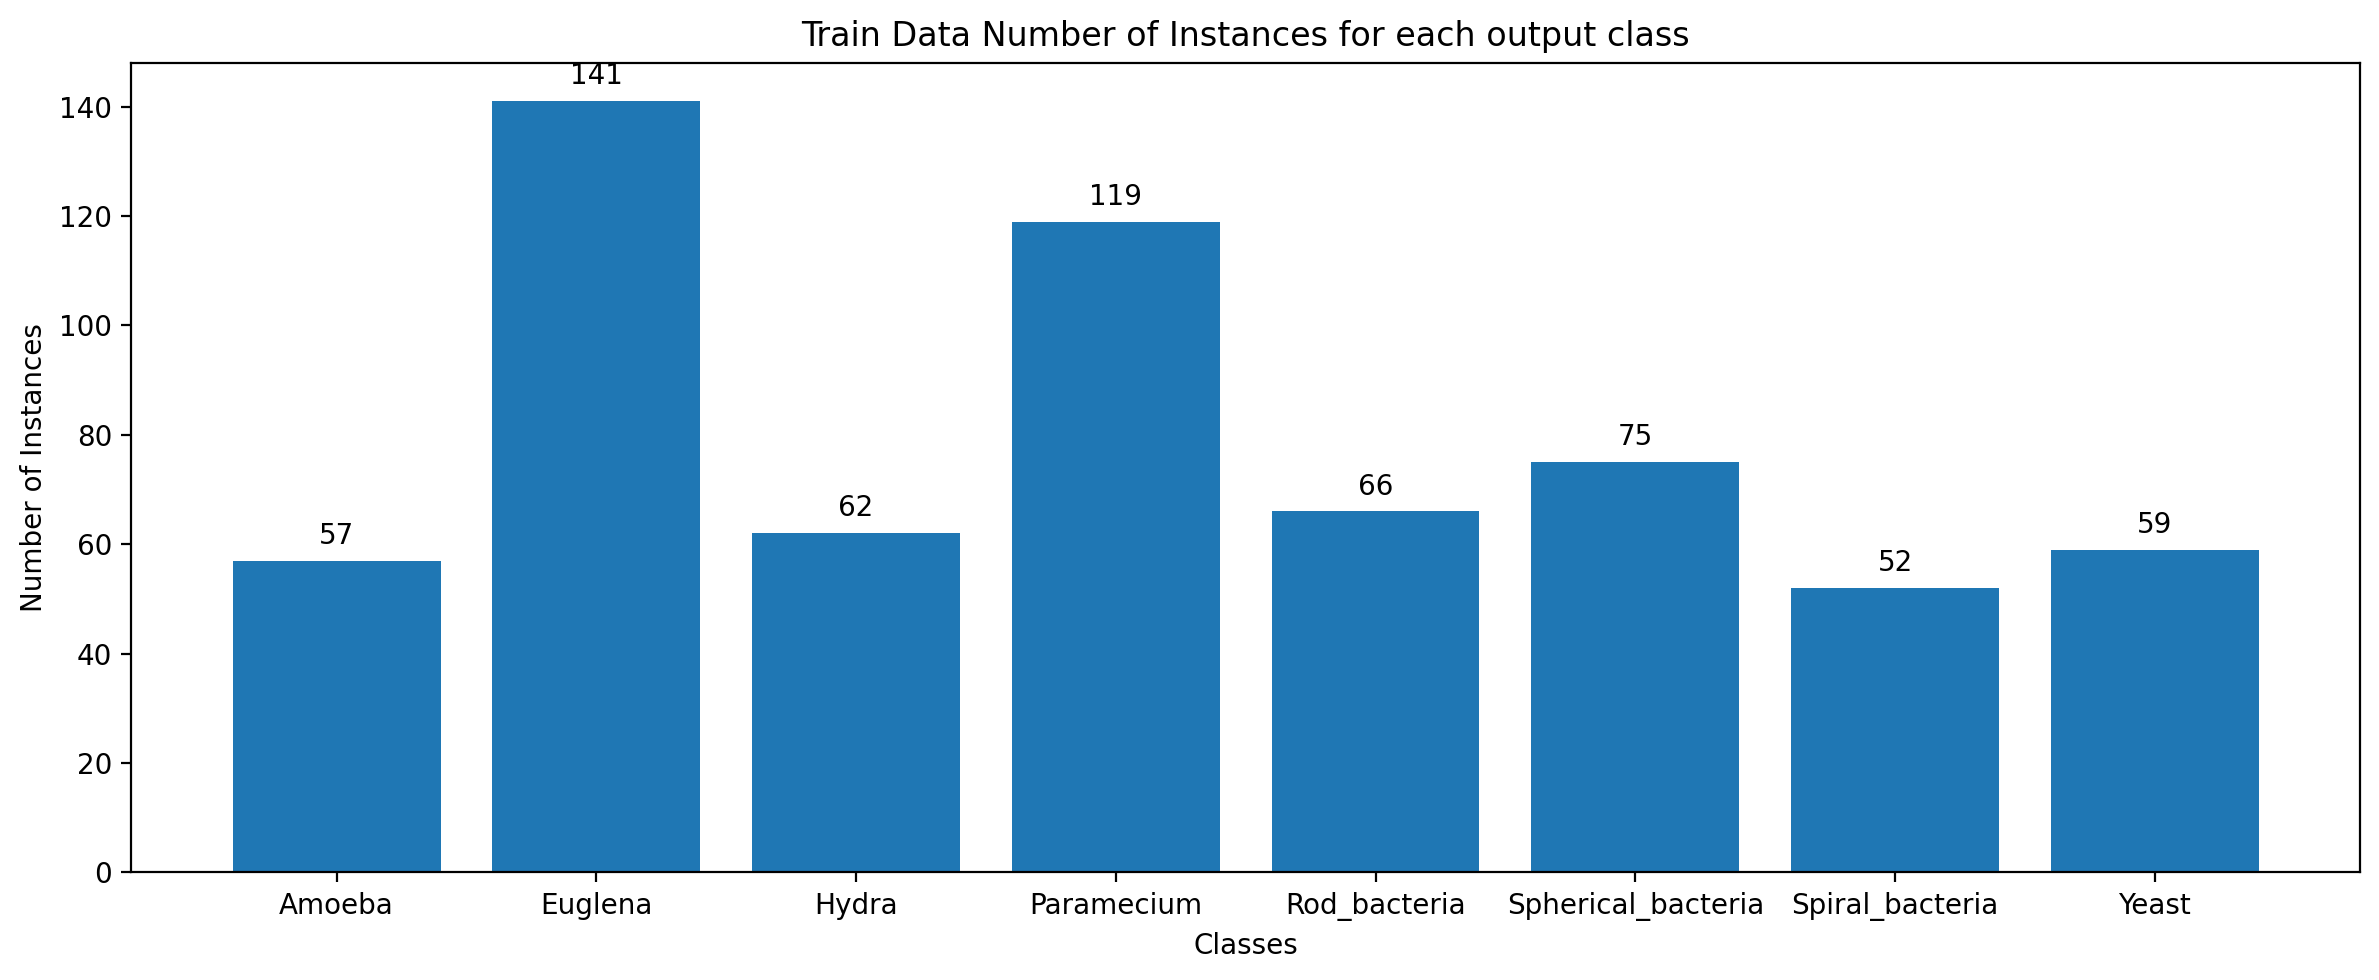


Test data distribution => 
        Microorganism  Count
0          Paramecium     33
1        Rod_bacteria     19
2               Hydra     14
3               Yeast     16
4             Euglena     27
5     Spiral_bacteria     23
6  Spherical_bacteria     11
7              Amoeba     15


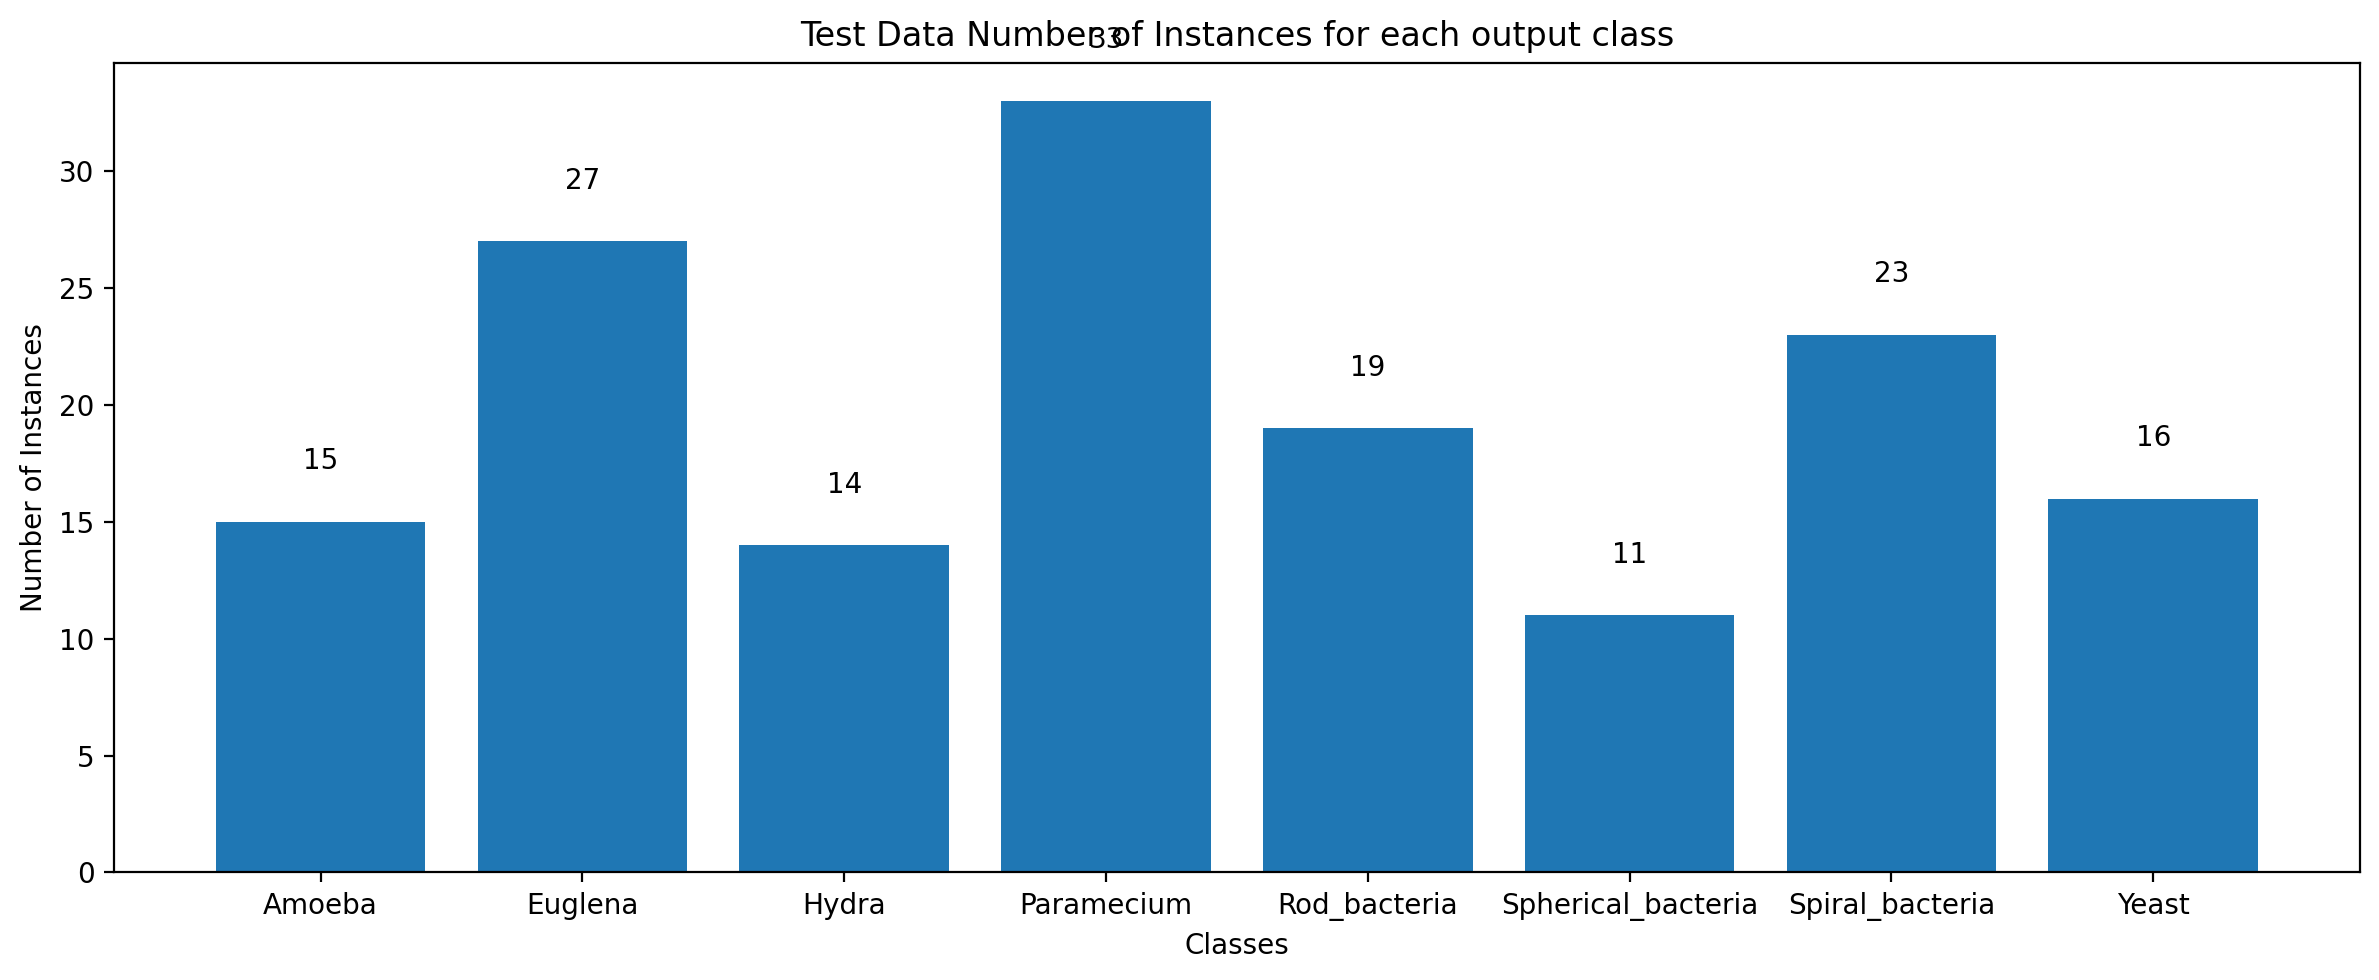

In [46]:
# Making the images to a standard size 
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image to 256x256
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=mean, std=std)  # Normalize the image
])

dataset = ImageFolder(root=path, transform=transform)

train_size = int(0.8 * len(dataset))  # 80% of data for training
test_size = len(dataset) - train_size
train_data, test_data = random_split(dataset, [train_size, test_size])

batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

print("\nTrain data distribution => ")
show_class_distribution(train_data, plot=True, title='Train Data Number of Instances for each output class', starter="train")
print("\nTest data distribution => ")
show_class_distribution(test_data, plot=True, title='Test Data Number of Instances for each output class', starter="test")

## a. Decide the number of layers and neurons in each layer (2 points)

In [12]:
class CNNModel(nn.Module):
    """
    Creating A simple CNN which will take sample input data size and the expected number of output classes.
    """
    def __init__(self, num_classes, img_height, img_width, dropout, activation_func):
        super(CNNModel, self).__init__()
        self.rescaling = nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True)
        )
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * (img_height // 8) * (img_width // 8), 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, num_classes)
        
        self.activation_func = activation_func
        self.dropout_fuction = nn.Dropout(p=dropout)
        

    def forward(self, x):
        x = self.rescaling(x)
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.flatten(x)
        x = self.activation_func(self.fc1(x))
        x = self.dropout_fuction(x)
        x = self.activation_func(self.fc2(x))
        x = self.dropout_fuction(x)
        x = self.activation_func(self.fc3(x))
        x = self.dropout_fuction(x)
        x = self.fc4(x)
        return x


## b. Try out different activation functions (explain each one you used) (4 points)

In [13]:
activation_functions = [nn.ReLU(), nn.Sigmoid(), nn.Softmax(), nn.Swish()]

## c. Try with and without using dropout (4 points)


In [14]:
dropouts = [0.0]#, 0.2]

## d. Try different regularizations apart from dropout (4 points)


In [15]:
regularization_params = [(0.001, 0.001)]

## e. Try different optimization algorithms (such as Gradient Descent, Adam, etc.) (4 points)


In [16]:
optimizers = [optim.Adam, optim.SGD]#, optim.RMSprop]

## f. Create a graph of f1 score vs epochs for training and validation set. (2 points) 

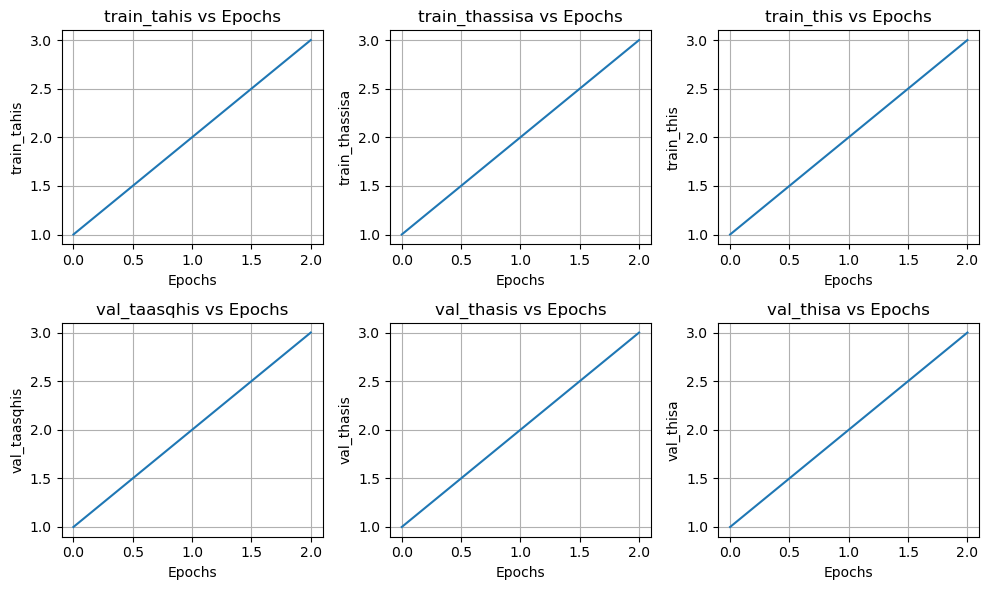

In [74]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


def plot_confusion_metrics(true_labels, predicted_labels):
    classes = [class_names[i] for i in np.unique(true_labels + predicted_labels)]
    cm = confusion_matrix(true_labels, predicted_labels, labels=classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for Multi-Class Classification')
    plt.show()

    
def plot_training_metrics(metrics, name="training"):
    """
        Plot the traning metrics
    """
    N = len(metrics)
    fig, axs = plt.subplots((N+2)//3, 3, figsize=(10, 3*N//3))
    metrics_names = [k for k in sorted(metrics.keys())]
    for i, ax in enumerate(axs.flatten()):
        if i >= len(metrics): continue
        metric = metrics_names[i]  
        ax.plot(metrics[metric])
        ax.set_title(f'{metric} vs Epochs')
        ax.set_xlabel('Epochs')
        ax.set_ylabel(f'{metric}')
        ax.grid(True)

    plt.tight_layout()
    plt.savefig(f"part2/{name}_training.png")
    plt.show()
    
plot_training_metrics({"train_this":[1,2,3], "val_thisa":[1,2,3], "train_tahis":[1,2,3],
                      "val_thasis":[1,2,3], "train_thassisa":[1,2,3], "val_taasqhis":[1,2,3]})

In [66]:
def evaluation(model, test_data):
    """
    Evaluate the model with test data
    """
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for data in test_data:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            actuals.extend(labels.numpy())  
            predictions.extend(predicted.numpy())
            
    # plot_confusion_metrics(actuals, predicted)
    return accuracy_score(predictions, actuals), f1_score(predictions, actuals, average='weighted')


def evaluation_metrics(model, train_loader, val_loader):
    metrics = {}
    
    trainAccuracy, train_f1 = evaluation(model, train_loader)
    metrics["train_f1_score"] = train_f1
    metrics["train_accuracy"] = trainAccuracy

    valAccuracy, val_f1 = evaluation(model, val_loader)
    metrics["val_f1_score"] = val_f1
    metrics["val_accuracy"] = valAccuracy
    
    return metrics


## g. Calculate the number of trainable parameters in your final model. (1 point)

In [19]:
model = CNNModel(8, 256, 256, 0.0, nn.ReLU())

print("layer wise parameters = \n")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Layer: {name:20}, Number of Parameters: {param.numel():>8}")
        
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\n{'-'*60}\nTotal Number of trainiable Params = {total_params:>24}\n")
      

layer wise parameters = 

Layer: rescaling.0.weight  , Number of Parameters:        9
Layer: rescaling.0.bias    , Number of Parameters:        3
Layer: rescaling.1.weight  , Number of Parameters:        3
Layer: rescaling.1.bias    , Number of Parameters:        3
Layer: conv1.weight        , Number of Parameters:      432
Layer: conv1.bias          , Number of Parameters:       16
Layer: conv2.weight        , Number of Parameters:     4608
Layer: conv2.bias          , Number of Parameters:       32
Layer: conv3.weight        , Number of Parameters:    18432
Layer: conv3.bias          , Number of Parameters:       64
Layer: fc1.weight          , Number of Parameters: 16777216
Layer: fc1.bias            , Number of Parameters:      256
Layer: fc2.weight          , Number of Parameters:    32768
Layer: fc2.bias            , Number of Parameters:      128
Layer: fc3.weight          , Number of Parameters:     8192
Layer: fc3.bias            , Number of Parameters:       64
Layer: fc4.wei

## Training

Started Trianing ...
Epoch 1, train_loss=2.0386 val_loss=2.0832 train_f1_score=0.3653 train_accuracy=0.2235 val_f1_score=0.2919 val_accuracy=0.1709
Epoch 2, train_loss=1.9762 val_loss=2.0346 train_f1_score=0.3764 train_accuracy=0.2504 val_f1_score=0.2879 val_accuracy=0.1772
Epoch 3, train_loss=1.9199 val_loss=2.0160 train_f1_score=0.3885 train_accuracy=0.2916 val_f1_score=0.2671 val_accuracy=0.1962
Epoch 4, train_loss=1.8968 val_loss=1.9987 train_f1_score=0.3971 train_accuracy=0.2900 val_f1_score=0.2843 val_accuracy=0.1962
Epoch 5, train_loss=1.8637 val_loss=1.9616 train_f1_score=0.4203 train_accuracy=0.3344 val_f1_score=0.2828 val_accuracy=0.2152
Epoch 6, train_loss=1.8081 val_loss=1.9033 train_f1_score=0.4497 train_accuracy=0.3978 val_f1_score=0.3398 val_accuracy=0.2848
Epoch 7, train_loss=1.7991 val_loss=1.9030 train_f1_score=0.3999 train_accuracy=0.3534 val_f1_score=0.3490 val_accuracy=0.2785
Epoch 8, train_loss=1.6985 val_loss=1.8893 train_f1_score=0.5090 train_accuracy=0.4707 val

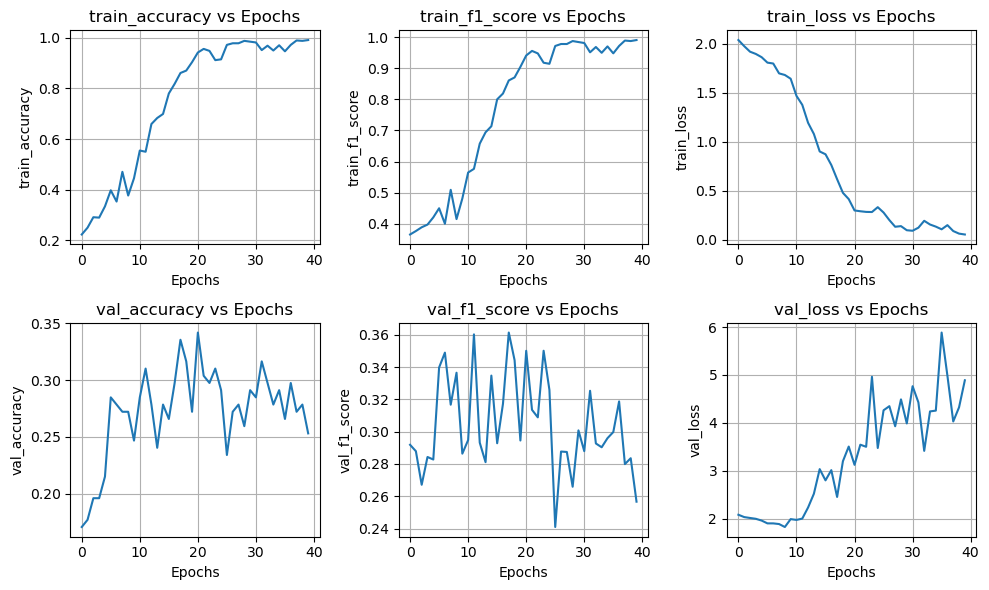

Finished Training with metrics = train_loss=0.0536 val_loss=4.8886 train_f1_score=0.9905 train_accuracy=0.9905 val_f1_score=0.2566 val_accuracy=0.2532


In [76]:
def training(train_loader, val_loader, num_epochs, model, 
             criterion, optimizer, name="training", verbose=0, plots=True):
    """
    This method will train the tensorflow Neural Network Model
    It takes the parameters like -
        train_loader = training data
        model = base model
        epocs  = number of iteration the moedls will be trained
        optmizer =  'adam' or 'SGD'
        criterion = which used to evaluate the model
        verbose = to control logs
    """
    print("Started Trianing ...")
    metrics = {"train_loss": [], "val_loss":[]}
    
    for epoch in range(num_epochs):
        model.train()
        epoch_loss, epoch_accuracy, running_loss = 0, 0, 0.0
        train_prediction, train_lables = [], []
        
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            
            # forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
    
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            running_loss += loss.item()
                        
            if verbose == 0 and i % 100 == 99:  # print every 100 mini-batches
                print(f'\tEpoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / len(train_loader)}')
                running_loss = 0.0
            
        metrics["train_loss"].append(epoch_loss/ len(train_loader))
        metrics["val_loss"].append(sum([criterion(model(inputs), labels).item() for inputs, labels in val_loader])/len(val_loader))
        
        
        for k, v in evaluation_metrics(model, train_loader, val_loader).items():
            if k not in metrics: metrics[k] = []
            metrics[k].append(v)
            
        if verbose: print(f"Epoch {epoch + 1}, {' '.join([f'{k}={v[-1]:.4f}' for k, v in metrics.items()])}")

    if plots: plot_training_metrics(metrics, name) 
        
    print(f"Finished Training with metrics = {' '.join([f'{k}={v[-1]:.4f}' for k, v in metrics.items()])}")
    return model, metrics


# for quick testing
model = CNNModel(8, 256, 256, 0.0, nn.ReLU())
model, metrics = training(train_loader = train_loader,
                          val_loader = test_loader,
                          num_epochs = 40,
                          model = model,
                          criterion = nn.CrossEntropyLoss(),
                          optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001),
                          name="quick_test",
                          verbose = 1)


	Training optimizer=type,loss=CrossEntropyLoss,activation=ReLU,dropout=0.0
Started Trianing ...
Epoch 1, train_loss=2.0076 val_loss=2.1279 train_f1_score=0.3736 train_accuracy=0.2488 val_f1_score=0.2884 val_accuracy=0.1709
Epoch 2, train_loss=1.9259 val_loss=1.9680 train_f1_score=0.3989 train_accuracy=0.2979 val_f1_score=0.2931 val_accuracy=0.2215
Epoch 3, train_loss=1.8569 val_loss=1.9656 train_f1_score=0.4212 train_accuracy=0.3471 val_f1_score=0.3399 val_accuracy=0.2785
Epoch 4, train_loss=1.8116 val_loss=2.0239 train_f1_score=0.4086 train_accuracy=0.3138 val_f1_score=0.2778 val_accuracy=0.2025
Epoch 5, train_loss=1.7519 val_loss=2.0318 train_f1_score=0.4535 train_accuracy=0.3693 val_f1_score=0.3918 val_accuracy=0.3038
Epoch 6, train_loss=1.6887 val_loss=1.9841 train_f1_score=0.4984 train_accuracy=0.4326 val_f1_score=0.3292 val_accuracy=0.2595
Epoch 7, train_loss=1.6198 val_loss=2.1693 train_f1_score=0.5105 train_accuracy=0.4406 val_f1_score=0.4016 val_accuracy=0.3165
Epoch 8, train

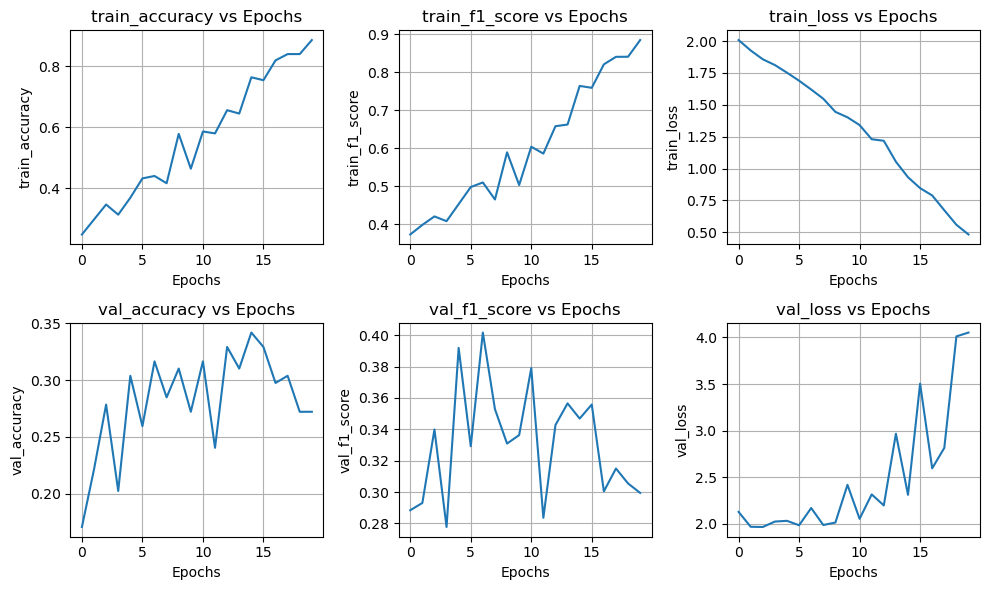

Finished Training with metrics = train_loss=0.4831 val_loss=4.0521 train_f1_score=0.8850 train_accuracy=0.8859 val_f1_score=0.2995 val_accuracy=0.2722


KeyError: 'val_loss'

In [75]:
loss_functions = [ nn.CrossEntropyLoss()]#, nn.MSELoss()]
result = {"optimizer":[], "loss": [], "dropout":[], "activation": [],
          "train_loss": [], "train_f1_score": [], "train_accuracy": [], "val_loss": [],
          "val_f1_score": [], "val_accuracy": [], "name": [], "regularization": []}

for activation_function in activation_functions:
    for dropout in dropouts:
        for (lr, weight_decay) in regularization_params:
            for optimizer in optimizers:
                for loss_function in loss_functions:
                    result["activation"].append(activation_function.__class__.__name__)
                    result["dropout"].append(dropout)
                    result["regularization"].append(f"[lr={lr},wd={weight_decay}]")
                    result["optimizer"].append(optimizer.__class__.__name__)
                    result["loss"].append(loss_function.__class__.__name__)
                    
                    name = []
                    for key in ["optimizer", "loss", "activation", "dropout"]:
                        name.append(f'{key}={result[key][-1]}')

                    result["name"].append(",".join(name))

                    print(f'''\n\tTraining {result["name"][-1]}''')

                    model = CNNModel(8, 256, 256, dropout, activation_function)
                    optimizer_val = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
                    model, metrics = training(train_loader = train_loader,
                                              val_loader = test_loader,
                                              num_epochs = 20,
                                              model = model,
                                              criterion = nn.CrossEntropyLoss(),
                                              optimizer = optimizer_val,
                                              name = name,
                                              verbose = 1)

                    result["train_loss"].append(metrics["train_loss"][-1])
                    result["train_accuracy"].append(metrics["train_loss"][-1])
                    result["train_f1_score"].append(metrics["train_f1_score"][-1])
                    result["val_loss"].append(metrics["val_loss"][-1])
                    result["val_f1_score"].append(metrics["val_f1_score"][-1])
                    result["val_accuracy"].append(metrics["val_accuracy"][-1])
                    

In [22]:
result_df = pd.DataFrame(result)
result_df

,optimizer,loss,dropout,activation,train_loss,train_f1_score,train_accuracy,val_f1_score,val_accuracy,name,regularization
0,type,CrossEntropyLoss,0.0,ReLU,0.497287,0.923599,0.497287,0.363559,0.348101,"optimizer=type,loss=CrossEntropyLoss,activatio...","[lr=0.001,wd=0.001]"
1,type,CrossEntropyLoss,0.0,ReLU,2.075728,0.168211,2.075728,0.158567,0.101266,"optimizer=type,loss=CrossEntropyLoss,activatio...","[lr=0.001,wd=0.001]"


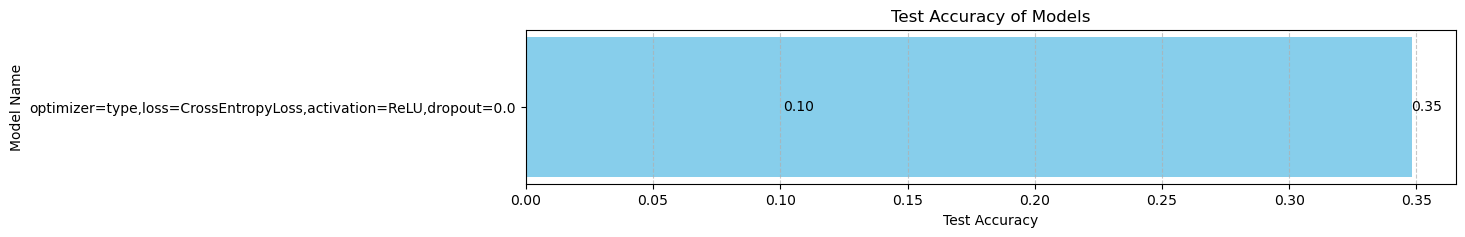

In [30]:
"""
Sort DataFrame by Test_Accuracy in increasing order and plot it for different models
"""

df_sorted = result_df.sort_values(by='val_accuracy')

plt.figure(figsize=(12, 1*len(result["optimizer"])))
bars = plt.barh(df_sorted['name'], df_sorted['val_accuracy'], color='skyblue')
for bar in bars:
#     plt.text(0, (bar.get_y() + bar.get_height()/2), f'{bar.get_width():.2f}',
#              va='center', ha='left', fontsize=10)
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10)
plt.xlabel('Test Accuracy')
plt.ylabel('Model Name')
plt.title('Test Accuracy of Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()